In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
us_farmers_market="https://assets.datacamp.com/production/repositories/3841/datasets/efdbc5d7c7b734f0b091d924605c4ad2664ef830/markets_cleaned.csv"

pollution_dataset="https://assets.datacamp.com/production/repositories/3841/datasets/a6b11493e11dd47f3e03e0b96e2a2dbc51f03cb2/pollution_wide.csv"



In [3]:
farmer = pd.read_csv(us_farmers_market, sep=',')
farmer.head()


,FMID,name,city,county,state,lat,lon,months_open,Bakedgoods,Beans,...,Plants,Poultry,Prepared,Seafood,Soap,Tofu,Trees,Vegetables,WildHarvested,Wine
0,1018261,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,-72.140337,44.411036,3.0,1,1,...,0,1,1,0,1,0,1,1,0,0
1,1018318,Stearns Homestead Farmers' Market,Parma,Cuyahoga,Ohio,-81.733939,41.374801,4.0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,1009364,106 S. Main Street Farmers Market,Six Mile,NaN,South Carolina,-82.818700,34.804200,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1010691,10th Steet Community Farmers Market,Lamar,Barton,Missouri,-94.274619,37.495628,8.0,1,0,...,1,1,1,0,1,0,0,1,0,0
4,1002454,112st Madison Avenue,New York,New York,New York,-73.949300,40.793900,5.0,1,0,...,0,0,1,0,1,0,0,1,0,0


In [4]:
pollution = pd.read_csv(pollution_dataset, sep=',')
pollution.head()

,city,year,month,day,CO,NO2,O3,SO2
0,Cincinnati,2012,1,1,0.245,20.0,0.030,4.20
1,Cincinnati,2012,1,2,0.185,9.0,0.025,6.35
2,Cincinnati,2012,1,3,0.335,31.0,0.025,4.25
3,Cincinnati,2012,1,4,0.305,25.0,0.016,17.15
4,Cincinnati,2012,1,5,0.345,21.0,0.016,11.05


In [5]:
pollution.city.unique()

array(['Cincinnati', 'Denver', 'Des Moines', 'Fairbanks', 'Houston',
       'Indianapolis', 'Long Beach', 'Vandenberg Air Force Base'],
      dtype=object)

In [6]:
cinci_pollution=pollution[pollution.city=='Cincinnati']
houston_pollution = pollution[pollution.city  ==  'Houston']

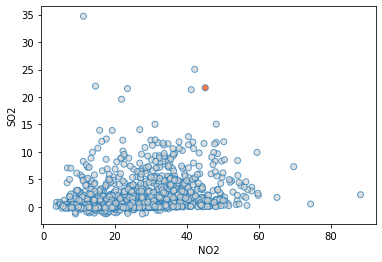

In [7]:
houston_pollution = pollution[pollution.city  ==  'Houston']

# Make array orangred for day 330 of year 2014, otherwise lightgray
houston_colors = ['orangered' if (day  ==  330) & (year ==  2014) else 'lightgray' 
                  for day,year in zip(houston_pollution.day, houston_pollution.year)]

sns.regplot(x = 'NO2',
            y = 'SO2',
            data = houston_pollution,
            fit_reg = False, 
            # Send scatterplot argument to color points 
            scatter_kws = {'facecolors': houston_colors, 'alpha': 0.7})
plt.show()

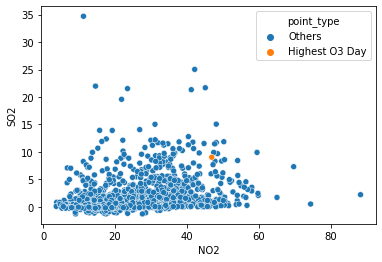

In [8]:
houston_pollution = pollution[pollution.city  ==  'Houston'].copy()

# Find the highest observed O3 value
max_O3 = houston_pollution.O3.max()


# Make a column that denotes which day had highest O3
houston_pollution['point_type'] = ['Highest O3 Day' if O3  ==  max_O3 else 'Others' for O3 in houston_pollution.O3]

# Encode the hue of the points with the O3 generated column
sns.scatterplot(x = 'NO2',
                y = 'SO2',
                hue = 'point_type',
                data = houston_pollution)
plt.show()

### KDE

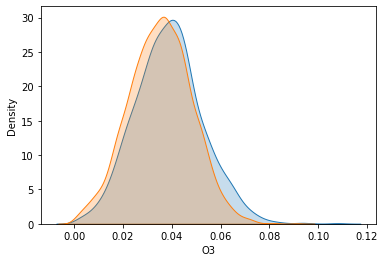

In [9]:
# kde - kernel destisity estimator - shows the area overlap much better than histogramme.
# rug plot - shows the data points. 

# Filter dataset to the year 2012
sns.kdeplot(pollution[pollution.year == 2012].O3, 
            # Shade under kde and add a helpful label
            shade = True,
            label = '2012')

# Filter dataset to everything except the year 2012
sns.kdeplot(pollution[pollution.year != 2012].O3, 
            # Again, shade under kde and add a helpful label
            shade = True,
            label = 'other years')
plt.show()

/Users/oyakesgin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/oyakesgin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/oyakesgin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, Futur

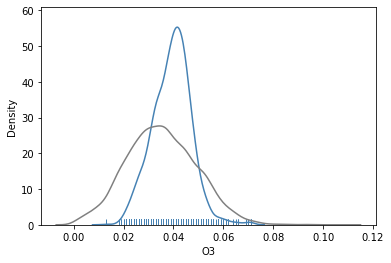

In [10]:
sns.distplot(pollution[pollution.city == 'Vandenberg Air Force Base'].O3, 
             label = 'Vandenberg', 
             # Turn of the histogram and color blue to stand out
             hist = False,
             color = 'steelblue', 
             # Turn on rugplot
             rug = True)

sns.distplot(pollution[pollution.city != 'Vandenberg Air Force Base'].O3, 
             label = 'Other cities',
             # Turn off histogram and color gray
             hist = False,  
             color = 'gray')
plt.show()

#Rug plots can improve KDEs as they help you see those gaps that you may have otherwise assumed were filled with data. In this plot, the rug plot shows that there is a small, but not neglible gap, in the data around O3 = 0.065.

/Users/oyakesgin/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/oyakesgin/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/oyakesgin/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 16.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


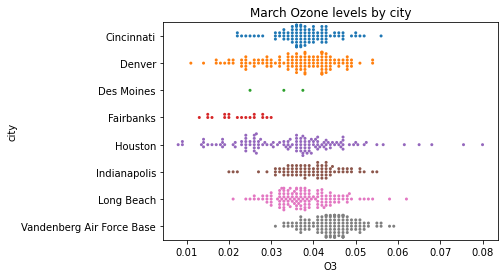

In [11]:
# Filter data to just March
pollution_mar = pollution[pollution.month == 3]


# Plot beeswarm with x as O3
sns.swarmplot(y = "city",
              x = 'O3', 
              data = pollution_mar, 
              # Decrease the size of the points to avoid crowding 
              size = 3)

# Give a descriptive title
plt.title('March Ozone levels by city')
plt.show()

Beeswarms are a nice (and nice looking) way of comparing a bunch of classes to each other. In the plot, you can see that Vandenberg on average has high O3 levels in March. However, Houston has a much wider range and can sometimes reach much higher levels.

Additionally, you can also get a sense of data quantities. Here, you see that Des Moines and Fairbanks have far fewer observations than the other sites.

### ANNOTATIONS

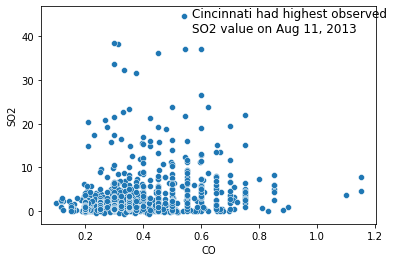

In [12]:
# Draw basic scatter plot of pollution data for August
sns.scatterplot(x = 'CO', y = 'SO2', data = pollution[pollution.month  ==  8])

# Label highest SO2 value with text annotation
plt.text(0.57, 41,
         'Cincinnati had highest observed\nSO2 value on Aug 11, 2013', 
         # Set the font to large
         fontdict = {'ha': 'left', 'size': 'large'})
plt.show()

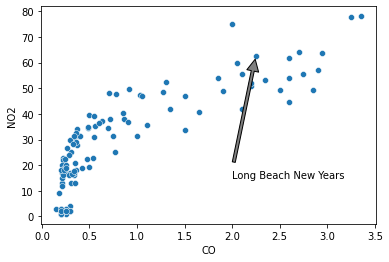

In [13]:
# Query and filter to New Years in Long Beach
jan_pollution = pollution.query("(month  ==  1) & (year  ==  2012)")

lb_newyears = jan_pollution.query("(day  ==  1) & ( city ==  'Long Beach')")

sns.scatterplot(x = 'CO', y = 'NO2',
                data = jan_pollution)

# Point arrow to lb_newyears & place text in lower left 
plt.annotate('Long Beach New Years',
             xy = (lb_newyears.CO, lb_newyears.NO2),
             xytext = (2, 15), 
             # Shrink the arrow to avoid occlusion
             arrowprops = {'facecolor':'gray', 'width': 3, 'shrink': 0.03},
             backgroundcolor = 'white')
plt.show()

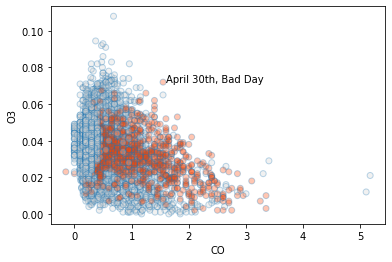

In [14]:
# Make a vector where Long Beach is orangered; else lightgray
is_lb = ['orangered' if city  ==  'Long Beach' else 'lightgray' for city in pollution['city']]

# Map facecolors to the list is_lb and set alpha to 0.3
sns.regplot(x = 'CO',
            y = 'O3',
            data = pollution,
            fit_reg = False,
            scatter_kws = {'facecolors':is_lb, 'alpha': 0.3})

# Add annotation to plot
plt.text(1.6, 0.072, 'April 30th, Bad Day')
plt.show() 

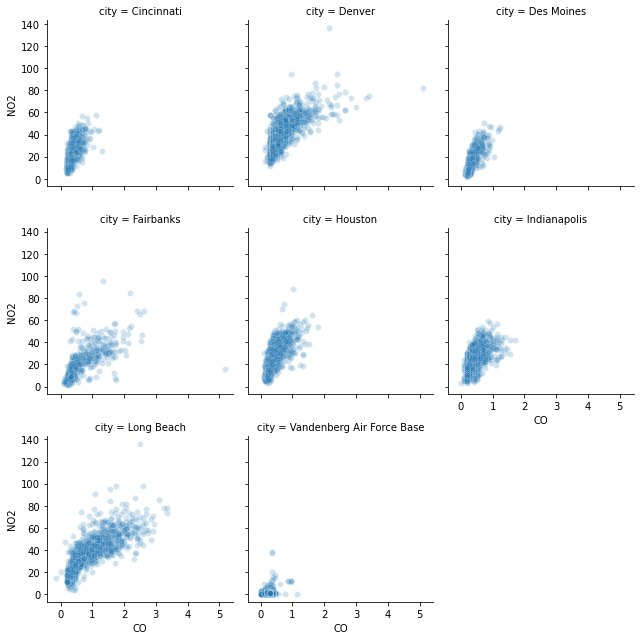

In [15]:
# Setup a facet grid to separate the cities apart
g = sns.FacetGrid(data = pollution,
                  col = 'city',
                  col_wrap = 3)

# Map sns.scatterplot to create separate city scatter plots
g.map(sns.scatterplot, 'CO', 'NO2', alpha = 0.2)
plt.show()

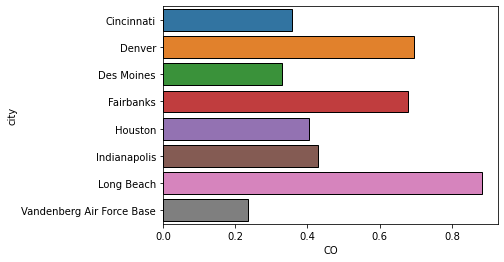

In [16]:
import numpy as np

sns.barplot(y = 'city', x = 'CO', 
              estimator = np.mean,
            ci = False,
              data = pollution,
              # Add a border to the bars
            edgecolor = 'black')
plt.show()

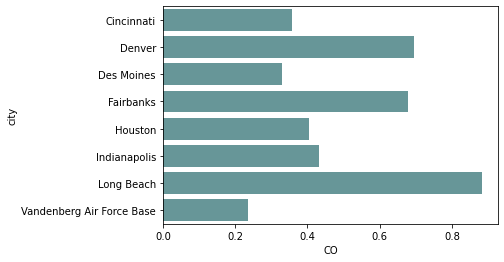

In [17]:
import numpy as np

sns.barplot(y = 'city', x = 'CO', 
              estimator = np.mean,
            ci = False,
              data = pollution
              # Replace border with bar colors
            ,color = 'cadetblue')
plt.show()

You are interested in the pollution levels of Cincinnati for the year 2014. Specifically, you're interested in CO and NO2, so you make a simple scatter plot to show the relationship between the two pollutants.

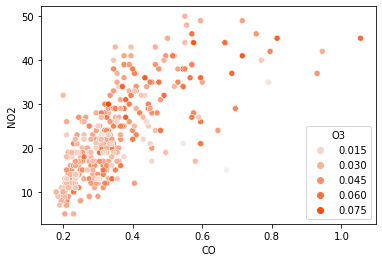

In [18]:
# Filter the data
cinci_2014 = pollution.query("city  ==  'Cincinnati' & year  ==  2014")

# Define a custom continuous color palette
color_palette = sns.light_palette('orangered',
                         as_cmap = True)

# Plot mapping the color of the points with custom palette
sns.scatterplot(x = 'CO',
                y = 'NO2',
                hue = 'O3', 
                data = cinci_2014,
                palette = color_palette)
plt.show()

In [19]:
# you want to compare all the cities against the average pollution value for CO in November 2015. 
#(As is provided in the DataFrame 

nov_2015_CO1 = pollution.query("month  ==  '11' & year  ==  2015")

In [20]:


# Define a custom palette
color_palette = sns.diverging_palette(250, 0, as_cmap = True)

# Pass palette to plot and set axis ranges
sns.heatmap(nov_2015_CO,
            cmap = color_palette,
            center = 0,
            vmin = -4,
            vmax = 4)
plt.yticks(rotation = 0)
plt.show()







NameError: name 'nov_2015_CO' is not defined

In [ ]:
#The figure you've been asked to make plots O3 values during October 2015 for various cities
#(provided as oct_2015_o3)

# Filter the data
October_2015 = pollution.query("month  ==  '10' & year  ==  2015")
oct_2015_o3= October_2015[['O3','city','day']]

print(oct_2015_o3)

In [ ]:
# Dark plot background
plt.style.use("dark_background")

# Modify palette for dark background
color_palette = sns.diverging_palette(250, 0,
                                      center = 'dark',
                                      as_cmap = True)

# Pass palette to plot and set center
sns.heatmap(oct_2015_o3,
            cmap = color_palette,
            center = 0)
plt.yticks(rotation = 0)
plt.show()


day                              0         1         2         3         4   ...        26        27        28        29        30
city                                                                         ...                                                  
Cincinnati                -0.570906 -0.648050       NaN       NaN       NaN  ...       NaN       NaN       NaN       NaN       NaN
Denver                    -0.185183 -0.185183 -0.185183 -0.493761 -0.262327  ... -0.030894  0.123396 -1.265207 -0.956629  0.277685
Des Moines                -0.378044 -0.185183 -0.185183 -1.033774 -0.725195  ... -1.265207       NaN       NaN       NaN       NaN
Fairbanks                 -0.956629 -1.573786 -1.650931 -1.728075 -1.728075  ... -2.190943 -1.188063 -1.188063 -0.648050 -0.570906
Houston                    1.049131  1.203420  1.049131  0.817697  0.509119  ... -0.185183  0.509119  1.820577  0.046251 -0.879484
Indianapolis              -0.185183 -0.648050 -0.879484 -0.339472 -0.262327  ... -0.879484 -0.956629 -0.725195 -1.342352 -0.802340
Long Beach                -0.030894  0.200540  0.354830  1.049131  0.663408  ... -0.416617 -0.416617  0.354830 -0.725195  0.431974
Vandenberg Air Force Base -0.185183  0.046251  1.203420  0.894842  1.126276  ...  0.663408  0.663408  0.586263  0.971986  0.894842

[8 rows x 31 columns]

In [ ]:
sns.palplot(sns.color_palette('Set2', 11))


In [ ]:
# Assign a new column to dataframe the desired combos

pollution['interesting cities'] = [x if x in ['Long Beach', 'Cincinnati'] else'other'for x in pollution['city'] ]
sns.scatterplot(x="NO2", y="SO2", hue = 'interesting cities', palette='Set2', data=pollution.query('year == 2014 & month == 12'))


In [ ]:
colorbrewer_palettes = ['Set1','Set2', 'Set3', 'Accent', 'Paired', 'Pastel1', 'Pastel2', 'Dark2']

for pal in colorbrewer_palettes:
    sns.palplot(pal=sns.color_palette(pal))
    plt.title(pal, loc = 'left')



In [ ]:
colorbrewer_palettes = ['Reds', 'Blues', 'YlOrBr', 'PuBuGn', 'GnBu', 'Greys']
for i, pal in enumerate(colorbrewer_palettes): 
    sns.palplot(pal=sns.color_palette(pal, n_colors=i+4))


In [ ]:
# Make a tertials column using qcut()
pollution['NO2 Tertial'] = pd.qcut(pollution['NO2'], 3, labels = False)
# Plot colored by the computer tertials
sns.scatterplot(x="CO", y="SO2", hue='NO2 Tertial', palette="OrRd",
                data=pollution.query("city == 'Long Beach' & year == 2014"))


In [ ]:
# Filter our data to Jan 2013
pollution_jan13 = pollution.query("month  ==  '1' & year  ==  2013")

In [ ]:
# Filter our data to Jan 2013
pollution_jan13 = pollution.query('year  == 2013 & month  ==  1')

#Change the palette to the 'Set2' ColorBrewer palette.

# Color lines by the city and use custom ColorBrewer palette
sns.lineplot(x = "day", 
             y = "CO", 
             hue = "city",
             palette = "Set2", 
             linewidth = 3,
             data = pollution_jan13)
plt.show()

In [ ]:
# Choose the combos that get distinct colors
wanted_combos = ['Vandenberg Air Force Base NO2', 'Long Beach CO', 'Cincinnati SO2']

In [ ]:
# Choose the combos that get distinct colors
wanted_combos = ['Vandenberg Air Force Base NO2', 'Long Beach CO', 'Cincinnati SO2']

# Assign a new column to DataFrame for isolating the desired combos
city_pol_month['color_cats'] = [x if x in wanted_combos else 'other' for x in city_pol_month['city_pol']]

# Plot lines with color driven by new column and lines driven by original categories
sns.lineplot(x = "month",
             y = "value",
             hue = 'color_cats',
             units = 'city_pol',
             estimator = None,
             palette = 'Set2',
             data = city_pol_month)
plt.show()

In [ ]:
# Divide CO into quartiles
pollution['CO quartile'] = pd.qcut(pollution['CO'], q = 4, labels = False)

# Filter to just Des Moines
des_moines = pollution.query("city  ==  'Des Moines'")

# Color points with by quartile and use ColorBrewer palette
sns.scatterplot(x = 'SO2',
                y = 'NO2',
                hue = 'CO quartile', 
                  data = des_moines,
                palette = 'GnBu')
plt.show()

In [ ]:
# Reduce to just cities in the western half of US
cities = ['Fairbanks', 'Long Beach', 'Vandenberg Air Force Base', 'Denver'
          ]

# Filter data to desired cities
city_maxes = max_pollutant_values[max_pollutant_values.city.isin(cities)]

# Swap city and year encodings
sns.catplot(x = 'city', hue = 'year',
              y = 'value', row = 'pollutant',    
              # Change palette to one appropriate for ordinal categories
              data = city_maxes, palette = 'BuGn',
              sharey = False, kind = 'bar')
plt.show()

max_pollutant_values.head()

         city  year pollutant state    value  month  day
0  Cincinnati  2012        CO  Ohio    1.195      2   60
1  Cincinnati  2012       NO2  Ohio   43.000      2   60
2  Cincinnati  2012        O3  Ohio    0.040      2   60
3  Cincinnati  2012       SO2  Ohio  102.350      2   60
4  Cincinnati  2013        CO  Ohio    1.320     12  365

### Point estimate intervals


In [ ]:
average_ests.head()

  pollutant       mean   std_err             y   seen      lower      upper
0        CO   0.351911  0.033563  95% Interval   0.40   0.286128   0.417694
1       NO2  19.021429  2.200518  95% Interval  16.00  14.708413  23.334444
2        O3   0.043982  0.001822  95% Interval   0.05   0.040411   0.047553
3       SO2   0.207143  0.037518  95% Interval   0.15   0.133607   0.280679

In [ ]:
# Construct CI bounds for averages
average_ests['lower'] = average_ests['mean'] - 1.96*average_ests['std_err']
average_ests['upper'] = average_ests['mean'] + 1.96*average_ests['std_err']

# Setup a grid of plots, with non-shared x axes limits
g = sns.FacetGrid(average_ests, row = 'pollutant', sharex = False)

# Plot CI for average estimate, pass the constructed interval boundaries to the mapped plt.hlines() function.
g.map(plt.hlines, 'y', 'lower', 'upper')

# Plot observed values for comparison and remove axes labels
g.map(plt.scatter, 'seen', 'y', color = 'orangered').set_ylabels('').set_xlabels('')

plt.show()




In [ ]:
# Set start and ends according to intervals 
# Make intervals thicker
plt.hlines(y = 'year', xmin = 'lower', xmax = 'upper', 
           linewidth = 5, color = 'steelblue', alpha = 0.7,
           data = diffs_by_year)
# Point estimates
plt.plot('mean', 'year', 'k|', data = diffs_by_year)

# Add a 'null' reference line at 0 and color orangered
plt.axvline(x = 0, color = 'orangered', linestyle = '--')

# Set descriptive axis labels and title
plt.xlabel('95% CI')
plt.title('Avg SO2 differences between Cincinnati and Indianapolis')
plt.show()

In [ ]:
# Draw 99% inverval bands for average NO2
vandenberg_NO2['lower'] = vandenberg_NO2['mean'] - 2.58*vandenberg_NO2['std_err']
vandenberg_NO2['upper'] = vandenberg_NO2['mean'] + 2.58*vandenberg_NO2['std_err']

# Plot mean estimate as a white semi-transparent line
plt.plot('day', 'mean', data = vandenberg_NO2,
         color = 'white', alpha = 0.4)

# Fill between the upper and lower confidence band values
plt.fill_between(x = 'day', 
                 y1 = 'lower', y2 = 'upper', 
                 data = vandenberg_NO2)

plt.show()

In [ ]:
# Setup a grid of plots with columns divided by location
g = sns.FacetGrid(eastern_SO2, col = 'city', col_wrap = 2)

# Map interval plots to each cities data with corol colored ribbons
g.map(plt.fill_between, 'day', 'lower', 'upper', color = 'coral')

# Map overlaid mean plots with white line
g.map(plt.plot, 'day', 'mean', color = 'white')

plt.show()


eastern_SO2.head()

         city  day    mean   std_err     lower      upper
0  Cincinnati   24  8.5150  1.297358  5.972178  11.057822
1  Cincinnati   25  8.8825  1.277753  6.378104  11.386896
2  Cincinnati   26  8.9450  1.281322  6.433609  11.456391
3  Cincinnati   27  8.4775  1.317059  5.896065  11.058935
4  Cincinnati   28  9.2325  1.416357  6.456441  12.008559

In [ ]:



for city, color in [('Denver',"#66c2a5"), ('Long Beach', "#fc8d62")]:
    # Filter data to desired city
    city_data = SO2_compare[SO2_compare.city  ==  city]

    # Set city interval color to desired and lower opacity
    plt.fill_between(x = 'day', y1 = 'lower', y2 = 'upper', data = city_data,
                     color = '#66c2a5', alpha = 0.4)
    
    # Draw a faint mean line for reference and give a label for legend
    plt.plot('day','mean', data = city_data, label = city,
             color = '#66c2a5', alpha = 0.25)

plt.legend()
plt.show()

From these two curves you can see that during the first half of the year Long Beach generally has a higher average SO2 value than Denver, in the middle of the year they are very close, and at the end of the year Denver seems to have higher averages. However, by showing the confidence intervals, you can see however that almost none of the year shows a statistically meaningful difference in average values between the two cities.

In [ ]:
# Add interval percent widths
alphas = [     0.01,  0.05,   0.1] 
widths = [ '99% CI', '95%', '90%']
colors = ['#fee08b','#fc8d59','#d53e4f']

for alpha, color, width in zip(alphas, colors, widths):
    # Grab confidence interval
    conf_ints = pollution_model.conf_int(alpha)
    
    # Pass current interval color and legend label to plot
    plt.hlines(y = conf_ints.index, xmin = conf_ints[0], xmax = conf_ints[1],
               colors = 'steelblue', label = width, linewidth = 10) 

# Draw point estimates
plt.plot(pollution_model.params, pollution_model.params.index, 'wo', label = 'Point Estimate')

plt.legend()
plt.show() 

In [ ]:
int_widths = ['90%', '99%']
z_scores = [1.67, 2.58]
colors = ['#fc8d59', '#fee08b']

for percent, Z, color in zip(int_widths, z_scores, colors):
    
    # Pass lower and upper confidence bounds and lower opacity
    plt.fill_between(
        x = cinci_13_no2.day, alpha = 0.40, color = color,
        y1 = cinci_13_no2['mean'] - Z*cinci_13_no2['std_err'],
        y2 = cinci_13_no2['mean'] + Z*cinci_13_no2['std_err'],
        label = percent)
    
plt.legend()
plt.show()


cinci_13_no2.head()

   day    mean   std_err
0   82  25.425  1.447795
1   83  25.250  1.429051
2   84  25.425  1.435656
3   85  25.275  1.454728
4   86  25.025  1.438092

In [ ]:
# Decrase interval thickness as interval widens
sizes =      [    15,  10,  5]
int_widths = ['90% CI', '95%', '99%']
z_scores =   [    1.67,  1.96,  2.58]

for percent, Z, size in zip(int_widths, z_scores, sizes):
    plt.hlines(y = rocket_model.pollutant, 
               xmin = rocket_model['est'] - Z*rocket_model['std_err'],
               xmax = rocket_model['est'] + Z*rocket_model['std_err'],
               label = percent, 
               # Resize lines and color them gray
               linewidth = 10, 
               color = 'gray') 
    
# Add point estimate
plt.plot('est', 'pollutant', 'wo', data = rocket_model, label = 'Point Estimate')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()


rocket_model.head()

  pollutant       est   std_err
0       SO2  0.138185  0.034651
1       NO2  0.320121  0.049849
2        CO  0.084282  0.024758
3        O3  0.565368  0.022191

### Visualizing the bootstrap


In [28]:
from sklearn.utils import resample
import numpy.random as npr
import pylab

def bootstrap(data, n_boots):
    return [np.mean(np.random.choice(data,len(data))) 
            for _ in range(n_boots) ]


/Users/oyakesgin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


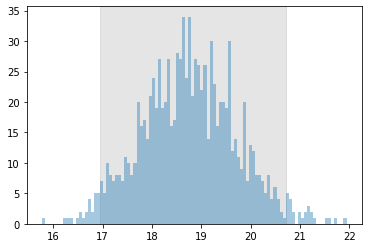

In [30]:
cinci_may_NO2 = pollution.query("city  ==  'Cincinnati' & month  ==  5").NO2
# Generate bootstrap samples
boot_means = bootstrap(cinci_may_NO2, 1000)

# Get lower and upper 95% interval bounds
lower, upper = np.percentile(boot_means, [2.5, 97.5])


# Plot shaded area for interval
plt.axvspan(lower, upper, color = 'gray', alpha = 0.2)

# Draw histogram of bootstrap samples
sns.distplot(boot_means, bins = 100, kde = False)

plt.show()


<AxesSubplot:>

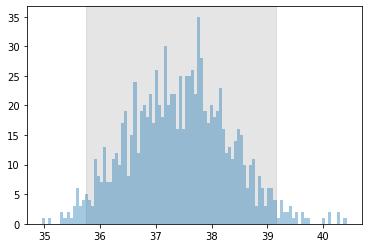

In [34]:
denver_may = pollution.query("city == 'Denver' & month == 8")
# Perform bootstrapped mean on a vector
def bootstrap(data, n_boots):
    return [np.mean(np.random.choice(data,len(data))) 
            for _ in range(n_boots) ]

# Generate 1,000 bootstrap samples
boot_means = bootstrap(denver_may.NO2, 1000)# Get lower and upper 95% interval bounds
lower,upper = np.percentile(boot_means, [2.5, 97.5])# Shaded background of interval
plt.axvspan(lower, upper, color='grey', alpha=0.2)# Plot histogram of samples
sns.distplot(boot_means, bins = 100, kde=False)


/Users/oyakesgin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


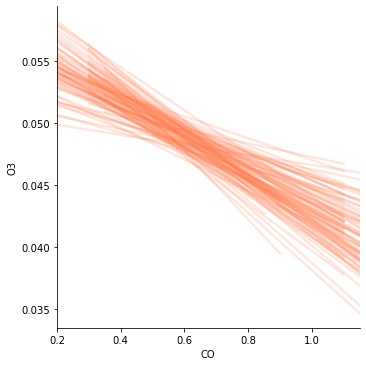

In [35]:
# Make dataframe of bootstraped data
denver_may_boot = pd.concat([    denver_may.sample(n=len(denver_may), replace=True).assign(sample=i) 
                             for i in range(100)])
# Plot regressions for each sample
sns.lmplot('CO', 'O3', data=denver_may_boot, scatter=False,
           # Tell seaborn to draw a regression 
           # line for each resample's data       
           hue='sample',# Make lines orange and transparent      
           line_kws = {'color': 'coral', 'alpha': 0.2},# No confidence intervals     
           ci=None, legend = False)


/Users/oyakesgin/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/oyakesgin/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 23.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/oyakesgin/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/oyakesgin/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 27.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/oyakesgin/opt/anaconda3/lib/pytho

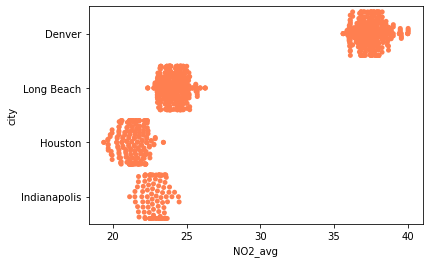

In [36]:
aug_pol = pollution.query("month == 8")
# Holder DataFrame for bootstrap samples
city_boots = pd.DataFrame()
for city in ['Denver', 'Long Beach', 'Houston', 'Indianapolis']:
    # Filter to city's NO2   
    city_NO2 = aug_pol[aug_pol.city == city].NO2
    # Perform 100 bootstrap samples of city's NO2 & put in DataFrame 
    cur_boot = pd.DataFrame({ 'NO2_avg': bootstrap(city_NO2, 100), 'city': city })
    # Append to other city's bootstraps 
    city_boots = pd.concat([city_boots,cur_boot])# Use beeswarm plot to visualize bootstrap samples 
    sns.swarmplot(y="city", x="NO2_avg", data=city_boots, # Set all the colors to be the same       
                  color='coral')


/Users/oyakesgin/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/oyakesgin/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/oyakesgin/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


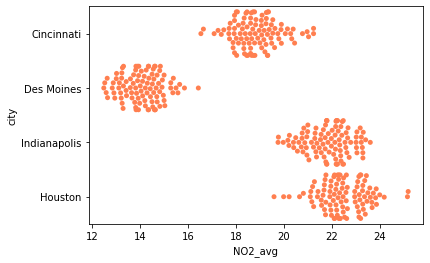

In [39]:
# Initialize a holder DataFrame for bootstrap results
pollution_may = pollution.query("month == 5")
city_boots = pd.DataFrame()

for city in ['Cincinnati', 'Des Moines', 'Indianapolis', 'Houston']:
    # Filter to city
    city_NO2 = pollution_may[pollution_may.city  ==  city].NO2
    # Bootstrap city data & put in DataFrame
    cur_boot = pd.DataFrame({'NO2_avg': bootstrap(city_NO2, 100), 'city': city})
    # Append to other city's bootstraps
    city_boots = pd.concat([city_boots,cur_boot])

# Beeswarm plot of averages with citys on y axis
sns.swarmplot(y = "city", x = "NO2_avg", data = city_boots, color = 'coral')

plt.show()

In [ ]:
sns.lmplot('NO2', 'SO2', data = no2_so2_boot,
           # Tell seaborn to a regression line for each sample
           hue = 'sample', 
           # Make lines blue and transparent
           line_kws = {'color': 'steelblue', 'alpha': 0.2},
           # Disable built-in confidence intervals
           ci = None, legend = False, scatter = False)

# Draw scatter of all points
plt.scatter('NO2', 'SO2', data = no2_so2)

plt.show()

### Visualization in the data science workflow

